In [59]:
import ipywidgets as widgets

In [9]:
import pandas as pd

In [16]:
import numpy as np

In [14]:
import matplotlib.pyplot as plt

In [65]:
import os, os.path

In [7]:
# test sample
csv_data = '/Users/xiaoxinzhou/Documents/IFT6758_CSV_data/regular_season/2017/2017020001.csv'

In [25]:
# convert csv to DF
df = pd.read_csv(csv_data)

In [26]:
print(df.shape)
df

(68, 17)


,eventIdx,Date & Time,Period,Period Time,Period Time Remaining,Period Type,Game ID,Team Name,Shot or Goal,X-Coordinate,Y-Coordinate,Shooter Name,Goalie Name,Scorer Name,Shot Type,Was Net Empty,Goalie Strength
0,5,2017-10-04T23:18:01Z,1,00:38,19:22,REGULAR,2017020001,Winnipeg Jets,Shot,-36.0,-28.0,Josh Morrissey,Frederik Andersen,NaN,Wrist Shot,False,NaN
1,7,2017-10-04T23:18:12Z,1,00:49,19:11,REGULAR,2017020001,Winnipeg Jets,Shot,-75.0,1.0,Shawn Matthias,Frederik Andersen,NaN,Wrist Shot,False,NaN
2,11,2017-10-04T23:19:04Z,1,01:03,18:57,REGULAR,2017020001,Winnipeg Jets,Shot,-73.0,10.0,Bryan Little,Frederik Andersen,NaN,Backhand,False,NaN
3,16,2017-10-04T23:20:20Z,1,01:46,18:14,REGULAR,2017020001,Toronto Maple Leafs,Shot,80.0,-3.0,Eric Fehr,Steve Mason,NaN,Wrist Shot,False,NaN
4,24,2017-10-04T23:23:13Z,1,03:42,16:18,REGULAR,2017020001,Winnipeg Jets,Shot,-44.0,-21.0,Patrik Laine,Frederik Andersen,NaN,Snap Shot,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,286,2017-10-05T01:36:33Z,3,11:57,08:03,REGULAR,2017020001,Toronto Maple Leafs,Goal,84.0,-3.0,Blake Wheeler,Connor Hellebuyck,Auston Matthews,Tip-In,False,Even
64,290,2017-10-05T01:38:16Z,3,12:57,07:03,REGULAR,2017020001,Winnipeg Jets,Goal,-80.0,1.0,Blake Wheeler,Frederik Andersen,Mathieu Perreault,Wrist Shot,False,Even
65,294,2017-10-05T01:42:12Z,3,13:55,06:05,REGULAR,2017020001,Winnipeg Jets,Shot,-66.0,8.0,Mark Scheifele,Frederik Andersen,NaN,Wrist Shot,False,NaN
66,298,2017-10-05T01:46:26Z,3,15:52,04:08,REGULAR,2017020001,Toronto Maple Leafs,Shot,83.0,-28.0,Patrick Marleau,Connor Hellebuyck,NaN,Backhand,False,NaN


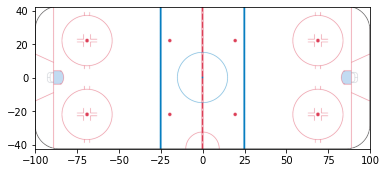

In [23]:
# create an empty axis
fig, ax = plt.subplots()
ax.set_xlim(-100, 100, 25)
# TODO: why the figure show 40, not 42.5?
ax.set_ylim(-42.5, 42.5, 21.25)

# add the rink image to background
img = plt.imread("../../figures/nhl_rink.png")
ax.imshow(img, extent=[-100, 100, -42.5, 42.5])

plt.show()

In [58]:
@widgets.interact(eventIdx=(1,303,1))
def find_x_y(eventIdx):
    """
    Given event ID, return its coordinates x and y.
    """
    # x: df['X-Coordinate']
    x = df[df['eventIdx']==eventIdx]['X-Coordinate']
    # y: df['Y-Coordinate']    
    y = df[df['eventIdx']==eventIdx]['Y-Coordinate']
    
    # create a figure with a single Axes
    fig, ax = plt.subplots()
    ax.set_xlim(-100, 100, 25)
    ax.set_ylim(-42.5, 42.5, 21.25)# TODO: why the figure show 40, not 42.5?

    # add the rink image to background
    img = plt.imread("../../figures/nhl_rink.png")
    ax.imshow(img, extent=[-100, 100, -42.5, 42.5])
    
    ax.scatter(pd.to_numeric(x), pd.to_numeric(y), s=500)
    
    plt.rcParams['figure.figsize'] = [12, 8]
    
    plt.show()

interactive(children=(IntSlider(value=152, description='eventIdx', max=303, min=1), Output()), _dom_classes=('…

In [67]:
widgets.Dropdown(
    options = ['2016', '2017', '2018', '2019', '2020'],
    description = 'Season:'
)


Dropdown(description='Season:', options=('2016', '2017', '2018', '2019', '2020'), value='2016')

In [99]:
# ==============================================================
# Allows user to select 'year' and 'game_type' from a dropdown
# ==============================================================
@widgets.interact(year=['2016', '2017', '2018', '2019', '2020'], game_type=['regular_season', 'playoffs'])
def display(year, game_type):
    
    game_type_code = '02' if game_type == 'regular_season' else '03'
    
    csv_path = f'/Users/xiaoxinzhou/Documents/IFT6758_CSV_data/{game_type}/{year}'
    
    # csv_counts is 1230, means the game ID is between 1 to 1230
    csv_counts = len([name for name in os.listdir(csv_path) if os.path.isfile(os.path.join(csv_path, name))])
    
    # ==============================================================
    # Given 'year' and 'game_type', find the game_number's range
    # ==============================================================
    @widgets.interact(game_number=(1, csv_counts, 1))
    def get_play_info(game_number):
        
        # convert a number to a 4-digit string: 5 -> "0005", 123 -> "0123"
        game_number_str = str(game_number).zfill(4)
        
        # generates 10-digit game ID
        game_id = f'{year}{game_type_code}{game_number_str}'
        
        filename = f'{csv_path}/{game_id}.csv'
        
        # read CSV
        df = pd.read_csv(csv_data)
        
        # find the max eventIdx
        max_eventIdx = df['eventIdx'].max()
        
        # ==============================================================
        # Finds out the eventIdx's range in current game
        # ==============================================================
        @widgets.interact(eventIdx=(1, max_eventIdx, 1))
        def get_event_info(eventIdx):
            
            # x: df['X-Coordinate']
            x = df[df['eventIdx']==eventIdx]['X-Coordinate']
            # y: df['Y-Coordinate']    
            y = df[df['eventIdx']==eventIdx]['Y-Coordinate']

            # create a figure with a single Axes
            fig, ax = plt.subplots()
            ax.set_xlim(-100, 100, 25)
            ax.set_ylim(-42.5, 42.5, 21.25)# TODO: why the figure show 40, not 42.5?

            # add the rink image to background
            img = plt.imread("../../figures/nhl_rink.png")
            ax.imshow(img, extent=[-100, 100, -42.5, 42.5])

            ax.scatter(pd.to_numeric(x), pd.to_numeric(y), s=500)

            plt.rcParams['figure.figsize'] = [12, 8]
            
            # ==================
            # Display game info
            # ==================
            display_columns = [
                'Date & Time',
                'Period Time',
                'Period Time Remaining',
                'Team Name',
                'Shooter Name',
                'Goalie Name',
                'Shot Type'
            ]
            for column in display_columns:
                
                value = df.loc[df['eventIdx'] == eventIdx, column].tolist()[0]
                print(f'{column}: {value}')
            

            plt.show()


interactive(children=(Dropdown(description='year', options=('2016', '2017', '2018', '2019', '2020'), value='20…